# Gentle introduction to Bayesian calibration, validation, and prediction with application to Covid-19 data
---

Prashant K. Jha and J. Tinsley Oden

Oden Institute for Computational Engineering and Sciences

University of Texas at Austin, TX


> ## Abstract
>
> We apply the Bayesian techniques of the model calibration, validation, and prediction to the real world data. We consider the confirmed cases of Covid-19 in Japan as the data and calibrate and validate the generalized (sub-exponential) growth model. We use the calibrated model to make a prediction at 100$^{\text{th}}$ day and quantify the uncertainty in the prediction.

# Introduction
Consider a transient scalar field $C: [0,T] \to [0, \infty)$ denoting the number of confirmed cases of Covid-19 virus as a function of time (in units of days) in some specific region, say Japan. We consider a simple generalized growth model for $C$. Following [5], we assume that $C$ satisfies following ODE:

\begin{align*}
\frac{d C}{dt} = rC(t)^p, \qquad \forall t \in (0,T], \hspace{40pt}(1)
\end{align*}

where $r\geq0$ is the growth rate and $p\in [0,1]$ is the deceleration of growth. When $p=0$, the model is a linear growth model, and when $p=1$, the model is an exponential growth model. Given the initial condition, i.e. the number of Covid-19 cases at $t=0$, $C_0$, (1) can be solved to get, for all $t\in [0,T]$, 

\begin{align*}
C(t) = \left( \frac{r}{m}t + (C_0)^{1/m} \right)^m, \hspace{40pt}(2)
\end{align*}

when $p \in (0,1)$. When $p=0$, $C(t) = C_0 + rt$, and when $p=1$, $C(t) = C_0 \exp[rt]$.
Model, for different parameters $(r,p)$, is depicted below:

![](results/Japan_model.png)

Objective of this work is to introduce the Bayesian techniques of model calibration, validation, and prediction by applying it to the present day relevant problem. We consider Japan's Covid-19 cases as the given data to fit the model (2) using Bayesian approach. We highlight and discuss various steps in the Bayesian approach including the practical challenges occurring during the numerical implementation. 

We seek to find the optimal value of parameters $(r,p)$ in the model (2) that best describes the real Covid-19 data. In other words, we want to fit (2) to the Covid-19 data. In the Bayesian approach, instead of finding one fixed value of parameter $(r,p)$, we seek the joint probability distribution of $(r,p)$. Using the joint probability distribution, we not only make the prediction about the quantity of interest (QoI), we can also measure the uncertainty in the prediction (or confidence in the prediction). In the remainder of this section, we present a brief overview of Bayesian learning in the context of fitting model (2) to the Covid-19 data. Interested readers can find more details in the reference [4] and references therein.

Let $\theta = (r,p) \in \Theta := [0,\infty) \times [0,1]$ denote the model parameter where $\Theta$ is the space where the parameters live in. Let $I = [0,T]$ be the time interval of interest, where $T$ is the final time at which we want to get the model prediction. We denote the discrete data $Y = (Y_1, Y_2, .., Y_N)$ where $Y_i$ is the total number of Covid-19 cases in specific region at day $i$. Let $C(t; \theta)$ denote the model output, i.e. the total number of confirmed cases, at time $t$ for parameter $\theta$. 

Suppose $\pi(\theta)$ denotes the prior probability distribution of the model parameter, $\pi(Y|\theta)$ denotes the conditional probability of the data when the parameter is fixed to $\theta$ (also called the likelihood function), $\pi(\theta|Y)$ denotes the conditional probability of the parameter for a given data $Y$ (also called the posterior), and $\pi(Y)$ denotes the evidence. We apply the Bayes' rule to relate the posterior (unknown) to the likelihood (known) and the prior (assumed):

\begin{align*}
\pi(\theta |Y) = \frac{\pi(Y|\theta)\pi(\theta)}{\pi(Y)}, \hspace{40pt}(3)
\end{align*}

where evidence $\pi(Y)$ is the marginalization of the numerator in (3) (so that the posterior is integrated to $1$). It is given by

\begin{align*}
\pi(Y) = \int_{\Theta} \pi(Y|\theta) \pi(\theta) d\theta. \hspace{40pt}(4)
\end{align*}

We see that, up to a proportionality constant, posterior is proportional to the multiple of likelihood function and prior distribution. Once the definition of the prior and the likelihood function is fixed, we can generate a parameter samples according to the posterior distribution using one of the Markov chain Monte Carlo methods (more details below).

## Prior distribution
We assume no prior knowledge about the parameters $(r,p)$. Therefore, we define the prior distribution as a uniform distribution over $\Theta$, i.e.,

\begin{align*}
\pi(\theta) = \chi_{\Theta}(\theta), \hspace{40pt}(5)
\end{align*}

where $\chi_{\Theta}$ is the usual indicator function.

## Noise in the data and the model inadequacy

### Experimental noise
The data $Y$ can be noisy, that is, the real number of Covid-19 cases could be bit different from the recorded data $Y$. This is called the experimental noise. Suppose $g$ is the real data, $Y$ is the recorded data with some margin of error, and $\epsilon$ is the noise, then $Y$ must be related to $g$ by some function $f$ (unknown)

\begin{align*}
Y = f(g, \epsilon).
\end{align*}

To proceed further, we need to assume some reasonable form of this function $f$. We suppose that $\epsilon$ follows the Gaussian distribution with mean $0$, take $f(g,\epsilon) = g + \epsilon$ (additive noise). This results in 

\begin{align*}
Y = g + \epsilon. \hspace{40pt}(6)
\end{align*}

Since $Y = (Y_1, ..., Y_N)$ is a vector, we can assume $\epsilon = (\epsilon_1, .., \epsilon_N)$ where each $\epsilon_i$ is given by the Gaussian distribution with 0 mean and $\sigma_{i}$ std deviation.

### Model inadequacy
For fixed parameter $\theta$, the model output at $t_i$ is denoted as $C(t_i; \theta)$. Let $\bar{C}(\theta) := (C(t_i;\theta), ..., C(t_N;\theta))$ is the vector of model output. Assuming that the model is imperfect, we introduce an additive modeling error $\gamma(\theta)$ such that the real data and the model output $\bar{C}(\theta)$ are related to each other by:

\begin{align*}
g - \bar{C}(\theta) = \gamma(\theta).  \hspace{40pt}(7)
\end{align*}

$\gamma$ can be assumed to follow some simpler probability distribution. As we see next, we can combine the experimental noise and the model inadequacy, and assume the probability distribution for the combined error $\gamma + \epsilon$.

Following [Section 4.3, 4], and also see (6), we have

\begin{align*}
Y - \epsilon - \bar{C}(\theta) = \gamma(\theta) \Rightarrow Y - \bar{C}(\theta) = \epsilon + \gamma(\theta), \hspace{40pt}(8)
\end{align*}

i.e., the difference between the recorded data and the model output is equal to the sum of the noise and the model inadequacy. 

In rest of this article, we assume $\epsilon + \gamma(\theta) \sim {\cal{N}}(\boldsymbol{0}, \boldsymbol{\sigma})$, where $\boldsymbol{\sigma}$ is the $N\times N$ diagonal matrix with $\boldsymbol{\sigma}_{ii} = \sigma$ for $1\leq i \leq N$. Here $\theta\sim {\cal{N}}(\mu, \sigma)$ means that $\theta$ is sampled from Gaussian distribution or the $\theta$ is the random variable with the probability distribution given by ${\cal{N}}(\mu, \sigma)$.


## Likelihood function
Recall that $\bar{C}(\theta) = (C(t_1; \theta),..., C(t_N; \theta))$ is a vector of model output at times $(t_1, ..., t_N)$ associated to the data $Y$. We define the likelihood function as follows:

\begin{align*}
\pi(Y|\theta) &= {\cal{N}}(Y - \bar{C}(\theta), \boldsymbol{\sigma}) \notag \\
&= \prod_{i=1}^{N} \frac{1}{\sigma_{ii}\sqrt{2\pi}} \exp\left[ -\frac{|Y_i - C(t_i; \theta)|^2}{2\sigma_{ii}^2} \right], \hspace{40pt}(9)
\end{align*}

where we have assumed $\boldsymbol{\sigma}$ to be the diagonal matrix with $\sigma_{ii} = \sigma$ for $1\leq i\leq N$. We can also compute the logarithm of the likelihood function:

\begin{align*}
  \log(\pi(Y|\theta)) = \sum_{i=1}^N \left[ -\frac{|Y_i - C(t_i; \theta)|^2}{2\sigma_{ii}^2} -\log(\sigma_{ii}\sqrt{2\pi})  \right]. \hspace{40pt}(10)
\end{align*}

## Posterior distribution
With the definitions of the likelihood function and the prior distribution at hand, we apply the Bayes' rule to get the posterior distribution:

\begin{align*}
  \pi(\theta|Y) \propto \pi(Y|\theta) \pi(\theta). \hspace{40pt}(11)
\end{align*}

One can change the proportionality sign to equality by introducing the evidence $\pi(Y)$, see (3). 

## Quantity of interest
Once the model is calibrated and validated, we use the posterior distribution for the model parameters to compute the quantity of interest (QoI). Suppose $Q(t, C)$ is the quantity of interest which is a function of time $t$ and function of model output $C$. With the posterior $\pi(\theta|Y)$, the quantity of interest $Q$ in the Bayesian approach is a random field as

\begin{align*}
  Q = Q(t, C) = Q(t, C(\theta)) \hspace{40pt}(12)
\end{align*}

is a function of $\theta$ through model $C$, and $\theta$ is the random field with the probability distribution $\pi(\theta|Y)$. The mean of QoI is given by

\begin{align*}
  E[Q](t, C) = \int_{\Theta} Q(t, C(\theta)) \pi(\theta|Y) d\theta. \hspace{40pt}(13)
\end{align*}

The uncertainty in the predicted QoI is given by the standard deviation of $Q$, i.e.,

\begin{align*}
  V[Q](t, C) = \int_{\Theta} (Q(t, C(\theta)) - E[Q](t, C))^2 \pi(\theta|Y) d\theta. \hspace{40pt}(14)
\end{align*}


## Markov chain Monte Carlo simulation
While (11) relates the known distributions, the likelihood function and the prior distribution, to the desired posterior distribution, we still need a method to find the posterior distribution using (11). 

Let $f$ and $g$ are two probability distributions such that $f\propto g$. The idea is to use the known distribution $g$ to compute the target distribution $f$. This is achieved by methods collectively known as Markov chain Monte Carlo. In this work, we use the Metropolis-Hastings method [1]. We consider a symmetric proposal distribution $q(\theta^\ast|\theta) \sim {\cal{N}}(\theta, \boldsymbol{\sigma}_{p})$ where $\theta^\ast$ is the new sample point, $\theta$ is the current sample point, and $\boldsymbol{\sigma}_p$ is the covariance matrix. From (11), we have a target distribution $f = \pi(\theta|Y)$ and the known probability distribution $g = \pi(Y|\theta) \pi(\theta)$. The acceptance distribution $\alpha(\theta^\ast, \theta)$, which gives the probability of accepting sample $\theta^\ast$ given that we are at sample $\theta$, is defined as:

\begin{align*}
\alpha(\theta^\ast, \theta) = \frac{q(\theta| \theta^\ast) g(\theta^\ast)}{q(\theta^\ast | \theta) g(\theta)} = \frac{g(\theta^\ast)}{g(\theta)}, \hspace{40pt}(15)
\end{align*}

where we used the fact that $q$ is symmetric and so $q(x|y) = q(y|x)$. If $\alpha \geq 1$ then we accept the sample $\theta^\ast$ and if $\alpha < 1$ then we reject the sample $\theta^\ast$ with probability $\alpha$. The MH (Metropolis-Hastings) is implemented in function `metropolis_hastings`.

## Posterior distribution from the MCMC samples
One last practical aspect of the Bayesian approach is how one can sample from the accepted samples of MCMC method or in other words what is the probability distribution inherent in the accepted MCMC samples? This question arises when we go from the calibration step to the validation step. There are two methods to obtain the probability distribution from the MCMC samples:

- *Gaussian approximation:* Compute the mean $\mu_{sample}$ and the standard deviation $\sigma_{sample}$ of the samples and approximate the posterior by Gaussian distribution, $\pi(\theta|Y) \sim {\cal{N}}(\mu_{sample}, \sigma_{sample})$. 

- *Kernel density estimation:* A more accurate approach is to apply the kernel density estimation to approximate the posterior. 

We will compare the results with above two approximations in Sec. 4.

## Calibration, validation, and prediction
Bayesian fitting of the data involves three steps:

### Calibration
We divide the data in the calibration set and the validation set. Let $Y^{c}, \bar{C}^c(\theta), \pi^c(\theta), \pi^c(Y^c|\theta), \pi^c(\theta|Y^c)$ denote the calibration data, model output at times associated to calibration data, prior in the calibration step, likelihood function defined on the calibration data $Y^c$ and model output $\bar{C}^c$, and calibration posterior. The calibration of the model consists of three steps:

[1.] Select the prior as follows
    
\begin{align*}
\pi^c(\theta) = \chi_{\Theta}(\theta).
\end{align*}
    
The likelihood $\pi^c(Y^c|\theta)$ is defined according to (9) with the data $Y^c$ instead of $Y$. The posterior follows the Bayes' rule, i.e., $\pi^c(\theta|Y^c)\propto \pi^c(Y^c|\theta)\pi^c(\theta)$. 
    
[2.] Apply MCMC to get the parameter samples following $\pi^c(\theta|Y^c)$ distribution.
    
[3.] Find the approximate posterior distribution $\pi^c(\theta|Y^c)$ from the MCMC samples, using either the Gaussian approximation or the Kernel Density Estimation. 
  
### Validation 
Let $Y^v, \bar{C}^v(\theta), \pi^v(\theta), \pi^v(Y^v|\theta), \pi^v(\theta|Y^v)$ are the validation data, model output at times corresponding to validation data, prior in the validation step, likelihood function defined on the validation data, and the validation posterior. The steps are as follows:
  
[1.] Select prior as follows
    
\begin{align*}
\pi^v(\theta) = \pi^c(\theta|Y^c).
\end{align*}
    
The likelihood $\pi^v(Y^v|\theta)$ is defined similar to $\pi^c(Y^c|\theta)$. The posterior satisfies $\pi(\theta|Y^v)\propto \pi^v(Y^v|\theta)\pi^v(\theta)$. 
    
[2.] Apply MCMC to get the parameter samples following $\pi^v(\theta|Y^v)$ distribution. Suppose the set of samples is denoted as $\Theta^v = (\theta^v_1, ..., \theta^v_{N^v})$.
    
[3.] Compute the validation error. Quantity of interest is the number of confirmed cases at validation times $(t^v_1, ..., t^v_{N_{valid}})$. At any given time, the number of confirmed cases is the mean of model ouput over MCMC parameter samples, i.e.
    
\begin{align*}
  Q^v(t, C) := \frac{1}{N^{v}} \sum_{s=1}^{N^{v}} C(t; \theta^v_{s}). \hspace{40pt}(16)
\end{align*}
    
We define the validation error $e^v$ as follows:

\begin{align*}
  e^v := \frac{\sum_{i=1}^{N_{valid}} |Y^v_i - Q^v(t^v_i, C)|^2 }{\sum_{i=1}^{N_{valid}} |Y^v_i|^2}. \hspace{40pt}(17)
\end{align*}

We consider the model as "Not invalid" if $e^v \leq \gamma_{tol}$. $\gamma_{tol}$ is the user defined tolerance.
  
### Prediction
If the model is "Not invalid", then the number of confirmed cases $Q = C(T=100; \theta)$ is the random field. The mean of $Q$ is the model prediction and the standard deviation is the uncertainty in the prediction. 

# Load libraries and get data

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import seaborn as sns
sns.set()
# sns.set_style("dark")
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 4})
mpl.rcParams['lines.linewidth'] = 3

In [2]:
# set country name and also set prefix string for filenames
country = 'Japan'
pref_file = 'results/' + country + '_'

In [3]:
# save plots (probably not when testing)
save_plots = True

## Define model

In [4]:
def model(theta, t, fix_params):
    
    r = theta[0]
    p = theta[1]
    C_0 = fix_params[0]
    
    if r < 1.e-5:
        r = 0.
    
    m = 1.
    cm = 0.
    if p > 1.e-5 and p < 1. - 1.e-5:
        m = 1. / (1. - p)
        cm = np.power(C_0, 1./m)
        
    C = []
    for i in range(len(t)):
        if p < 1.e-5:
            C.append(r * t[i] + C_0)
        elif p > 1. - 1.e-5:
            C.append(C_0 * np.exp(r * t[i]))
        else:
            C.append(np.power(r * t[i] / m + cm, m))
            
    return np.array(C)

## Metropolis-Hashtings implementation

In [5]:
# prior for model
def prior(theta):
    if theta[0]<=1.e-5 or theta[1] <=1.e-5:
        return 1.e-8
    elif theta[1] >= 1. - 1.e-5:
        return 1.e-8
    else:
        return 1.


# likelihood
def log_like(theta, model, t, data, fix_params, noise_sigma):
    
    # get model output
    C = model(theta, t, fix_params)
    
    # log likelihood
    return (-1. / (2. * noise_sigma * noise_sigma)) * np.dot(data - C, data - C)

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order 
        # to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


## MCMC
def metropolis_hastings(model, likelihood, prior, transition_model,
                        acceptance_rule, param_init, iterations, 
                        t, data, fix_params, noise_sigma, dbg_lvl = 0):
    #
    # Description
    #
    # model(x, t, fix_params): returns model output
    #
    # likelihood(x, model, t, data, fix_params, noise_sigma): returns the likelihood that 
    # these parameters generated the data
    #
    # prior(x): returns prior
    #
    # transition_model(x): a function that draws a sample from a 
    # symmetric distribution and returns it
    #
    # acceptance_rule(x, x_new): decides whether to accept or reject the new sample
    #
    # param_init: a starting sample
    #
    # iterations: number of accepted to generated
    #
    # t: time vector
    #
    # data: data vector
    #
    # fix_params: parameter vectors required by model
    #
    # noise_sigma: std deviation of the gaussian noise on data
    #
    # dbg_lvl: specify if produce info output or not. If set 2, it will be quiet
    # 
    
    if dbg_lvl < 2:
        print('\nMCMC simulation')
    
    x = param_init
    accepted = []
    rejected = []
    num_accepted = []
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood(x, model, t, data, fix_params, noise_sigma)
        x_new_lik = likelihood(x_new, model, t, data, fix_params, noise_sigma) 
        if (acceptance_rule(x_lik + np.log(prior(x)),
                            x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
            
        
        if i % (iterations/10) == 0 and i > 0:
            num_accepted.append(len(accepted))
            if dbg_lvl < 2:
                print('iteration: {}, number of accepted: {}'.format(i, len(accepted)))
                
                
    if dbg_lvl < 2:
        print('Percentage of accepted samples: {}%\n\n'.format(100. * len(accepted)/iterations))
                
    return np.array(accepted), np.array(rejected), np.array(num_accepted)

## Functions to process MCMC samples

In [6]:
# compute percentage of samples which were accepted in first 20% of iterations
def per_acc(iter_fraction, acc_counts):
    n = int(iter_fraction*10.) - 1
    if n < 0:
        return 0.
    else:
        return acc_counts[n] / acc_counts[len(acc_counts) - 1]
    
    
def process_burn(accepted, rejected, burn_in_perc, model, t, data, fix_params, dbg_lvl, step_name):
    
    # dbg_lvl
    # 0 - output all info 
    # 2 - only output accepted shape and plot
    # 3 - no output
    
    # get sampled parameters
    a_acc = accepted[:, 0]
    b_acc = accepted[:, 1]
    a_acc_mean = np.mean(a_acc)
    b_acc_mean = np.mean(b_acc)
    C_acc = model([a_acc_mean, b_acc_mean], t, fix_params)
    
    N_acc = len(a_acc)
    burn_in = int(burn_in_perc * len(a_acc))

    a_acc_burn = a_acc[-(N_acc - burn_in):]
    b_acc_burn = b_acc[-(N_acc - burn_in):]
    
    if dbg_lvl < 2:
        print('a_acc_burn shape: {}'.format(a_acc_burn.shape))
        print('b_acc_burn shape: {}'.format(b_acc_burn.shape))
        print('\n')

    if dbg_lvl < 1:
        print('a_acc_burn: {}'.format(a_acc_burn))
        print('b_acc_burn: {}'.format(b_acc_burn))
        print('\n')
       
    # print('\n\n')
    # plot_vec()

    
    a_acc_burn_mean = np.mean(a_acc_burn)
    b_acc_burn_mean = np.mean(b_acc_burn)

    if dbg_lvl < 3:
        print('a_acc_burn_mean: {}'.format(a_acc_burn_mean))
        print('b_acc_burn_mean: {}'.format(b_acc_burn_mean))
        print('\n')
        
    return a_acc_burn.reshape((len(a_acc_burn),1)), b_acc_burn.reshape((len(b_acc_burn),1))

## Functions to compute pdf from samples

In [7]:
def kde(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x)
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid)
    return np.exp(log_pdf)


def gaussian(x, mu, sigma):
    """Gaussian distribution at sample points"""
    b = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
        
    return np.array(b)

def log_gaussian(x, mu, sigma):
    """log of gaussian distribution"""
    b = -np.log(sigma * np.sqrt(2 * np.pi)) + ( - (x - mu)**2 / (2 * sigma**2) )
        
    return np.array(b)

def log_kde(pdf, x_grid):
    """Return log of kde distribution at grid points"""
    
    return pdf.score_samples(x_grid)

def extend_bin(bins, upper, lower):
    """Extend bins on left and right side"""
    
    bins_lower = np.linspace(lower, np.min(bins), num=50)[:, np.newaxis]
    bins_upper = np.linspace(np.max(bins), upper, num=50)[:, np.newaxis]
    
    bins_ext = np.concatenate((bins_lower, bins))
    bins_ext = np.concatenate((bins_ext, bins_upper))
    
    return bins_ext


def hist_1d(x, nbins):
    """Get histogram data"""
    histo, bin_edges = np.histogram(x,nbins, density=True)
    bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
    #plt.step(bin_center,histo,where='mid')
    #plt.show()
    return np.array(histo)[:, np.newaxis], np.array(bin_center)[:, np.newaxis]

## QoI related functions

In [8]:
def get_qoi_dist(model, samples_a, samples_b, time, fix_params):
    
    N = len(samples_a)
    
    predict = []
    for i in range(N):
        a = samples_a[i]
        b = samples_b[i]
        predict.append(model([a,b], [time], fix_params)[0][0])
        
    return np.array(predict), np.mean(predict), np.std(predict)

# compute the QoI (mean) at validation times
def get_qoi_valid(model, samples_a, samples_b, times, fix_params):
    
    qoi = []
    for i in range(len(times)):
        pred, pred_mean, pred_std = get_qoi_dist(model, samples_a, 
                                                 samples_b, times[i], fix_params)
        qoi.append(pred_mean)
    return np.array(qoi)


# compute model prediction (basically QoI)
def get_predict_vec(model, samples_a, samples_b, t_new, fix_params, t, Y):
    
    N = len(samples_a)
    
    predict = []
    predict_new = []
    
    ntime = len(t) + len(t_new)
    for j in range(ntime):
        time = 0.
        if j < len(t):
            time = t[j]
        else:
            time = t_new[j - len(t)]
        
        p = 0.
        for i in range(N):
            a = samples_a[i]
            b = samples_b[i]
            p += model([a,b], [time], fix_params)[0]
            
        if j < len(t):
            predict.append(p/N)
        else:
            predict_new.append(p/N)
            
    return np.array(predict), np.array(predict_new)

## Read data file

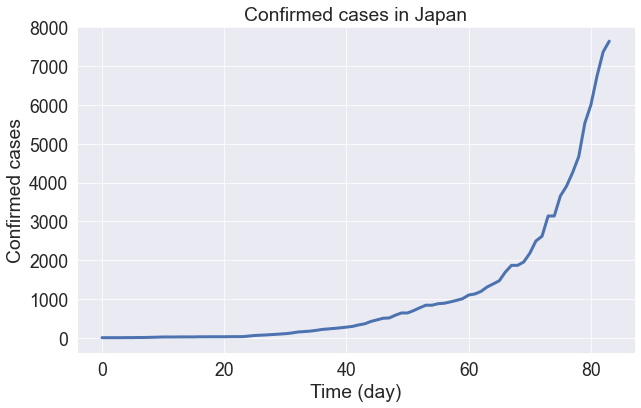

In [9]:
df = np.loadtxt(country+'.csv', delimiter=',')
df = df.T

# final time
T = 100.

# time
t = df[0]

# cases
Y = df[1]

# initial condition 
C_0 = Y[0]

#print('data shape: {}'.format(Y.shape))

#print('\n\n')
plt.figure(figsize=(10,6))
plt.plot(t, Y)
# plt.title('Confirmed cases')
plt.xlabel('Time (day)')
plt.ylabel('Confirmed cases')
plt.title('Confirmed cases in Japan')
if save_plots:
    plt.savefig(pref_file + 'data.pdf')
    plt.savefig(pref_file + 'data.png')
plt.show()

## Split data

In [10]:
N_calib = int(0.75 * len(Y))
N_valid = len(Y) - N_calib

t_calib = t[0:N_calib]
Y_calib = Y[0:N_calib]

t_valid = t[-N_valid:]
Y_valid = Y[-N_valid:]

## Model for different parameters

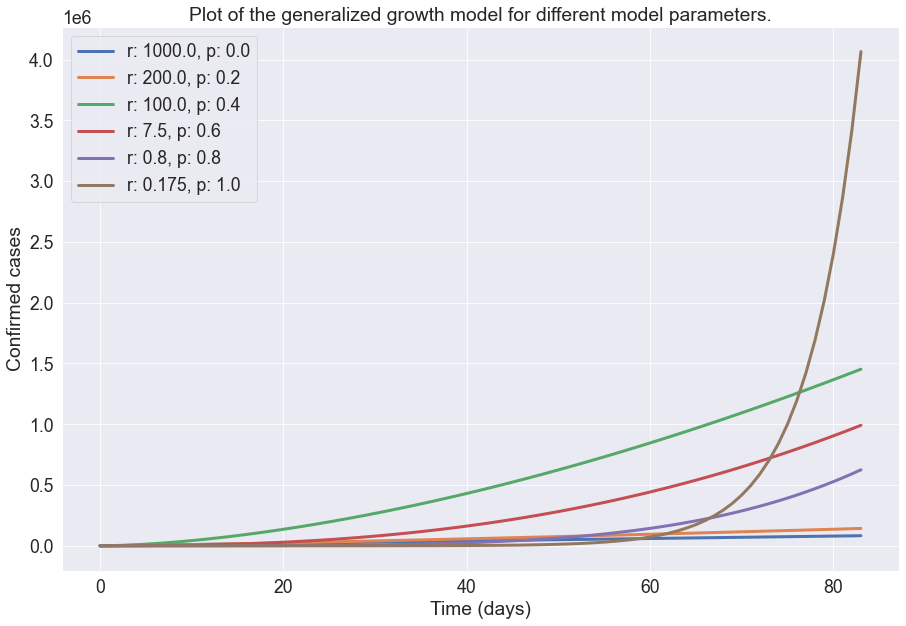

In [11]:
r_vec = [1000., 200., 100., 7.5, 0.8, 0.175]
p_vec = [0., 0.2, 0.4, 0.6, 0.8, 1.]

fig = plt.figure(figsize=(15., 10.))
for i in range(len(r_vec)):
    
    r = r_vec[i]
    p = p_vec[i]
    
    C = model([r,p], t, [C_0, T])
    plt.plot(t, C, label='r: {}, p: {}'.format(r, p))
    
plt.title('Plot of the generalized growth model for different model parameters.')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'model.pdf')
    plt.savefig(pref_file + 'model.png')
plt.show()

# Covid-19 data and the hyper parameters
The data for novel coronavirus (Covid-19) is freely available from various sources. Three of these sources are listed in [2]. For the demonstration, we consider the number of confirmed cases recorded in Japan at different days starting from 22 January 2020 until 14 April 2020 (total 84 days), see plot of the data below:

![](results/Japan_data.png)

We consider $Y^c = (Y_1, ..., Y_{60})$ at days $t^c = (1, ..., 60)$ as the calibration data and $Y^v = (Y_{61}, ..., Y_{84})$ at days $t^v = (61, ..., 84)$ as the validation data. The final time is $T = 100$. This is also the time at which we want to predict the number of confirmed cases. 

## Hyper parameters
We fix the standard deviation $\sigma$ in Gaussian distribution for the noise and the model inadequacy as $\sigma = 100$.

The proposal distribution $q(\theta'|\theta)$ in MCMC method is assumed to be the Gaussian ${\mathcal{N}}(\theta, \boldsymbol{\sigma}_{p})$ where $\boldsymbol{\sigma}_{p}$ is the covariance matrix. We consider 
\begin{align}
  \boldsymbol{\sigma}_p = \begin{bmatrix}
  \sigma_{p,11} & 0 \\
  0 & \sigma_{p,22}
  \end{bmatrix},
\end{align}
where $\sigma_{p,11} = 1$ and $\sigma_{p,22} = 0.01$. 

The number of MCMC iteration is fixed to $N_{iter} = 100000$. 

## Model selection tolerance
We set $\gamma_{tol} = 0.01$.

# Calibration step
>The initial value of the parameter is $\theta_0 = (0,0)$. The acceptance rate in the Metropolis-Hastings is about $0.53\%$ (changes in every run). The samples generated in the first 20000 iteration (i.e. first 20$\%$ of the iterations) were discarded. The mean of the samples was $\theta^c_{mean} = (r^c_{mean}, p^c_{mean}) = (0.297, 0.758)$ (subject to change in every run). 

## Generate posterior samples

In [12]:
# verbosity
dbg_lvl = 1

# get new parameter by considering normal distribution centered at old value
transition_model = lambda x: np.random.normal(x,[1.,0.01],(2,))

# standard deviation of the noise of data
noise_sigma = 100.

# initial guess 
theta_0 = [0., 0.]

# model1 options
m1_opts = [C_0, T]

## run
m1_acc_calib, m1_rej_calib, m1_num_acc_calib = metropolis_hastings(model, log_like, 
                                         prior, transition_model,
                                         acceptance, theta_0, 100000,
                                         t_calib, Y_calib, m1_opts, noise_sigma, dbg_lvl)


MCMC simulation
iteration: 10000, number of accepted: 254
iteration: 20000, number of accepted: 283
iteration: 30000, number of accepted: 315
iteration: 40000, number of accepted: 344
iteration: 50000, number of accepted: 375
iteration: 60000, number of accepted: 409
iteration: 70000, number of accepted: 431
iteration: 80000, number of accepted: 465
iteration: 90000, number of accepted: 493
Percentage of accepted samples: 0.531%




In [13]:
m1_a_calib, m1_b_calib = process_burn(m1_acc_calib, m1_rej_calib, 
                                      per_acc(0.2, m1_num_acc_calib), model, 
                                      t_calib, Y_calib, m1_opts, dbg_lvl, 'calibration')

a_acc_burn shape: (227,)
b_acc_burn shape: (227,)


a_acc_burn_mean: 0.296869657017331
b_acc_burn_mean: 0.7581242582481509




## Calibrated model plot

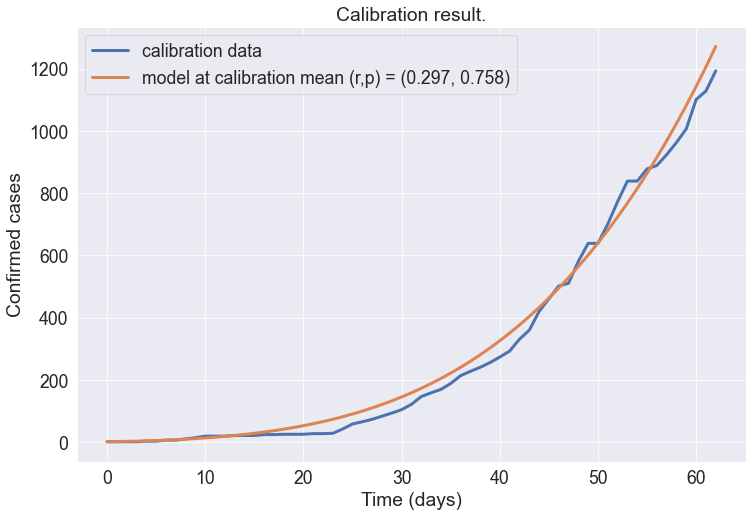

In [14]:
## Plot model and data
fig  = plt.figure(figsize=(12,8))

# get model
m1_a_mean_calib = np.mean(m1_a_calib)
m1_b_mean_calib = np.mean(m1_b_calib)

m1_C_acc_burn_calib = model([m1_a_mean_calib, m1_b_mean_calib], t_calib, m1_opts)

plt.plot(t_calib, Y_calib, label='calibration data')
# plt.plot(t, C_acc, label='{} (without burn-in)'.format(step_name))
plt.plot(t_calib, m1_C_acc_burn_calib, 
         label='model at calibration mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_calib, m1_b_mean_calib))
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.title('Calibration result.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'calib_plot.pdf')
    plt.savefig(pref_file + 'calib_plot.png')
    
plt.show()

## Histogram plot

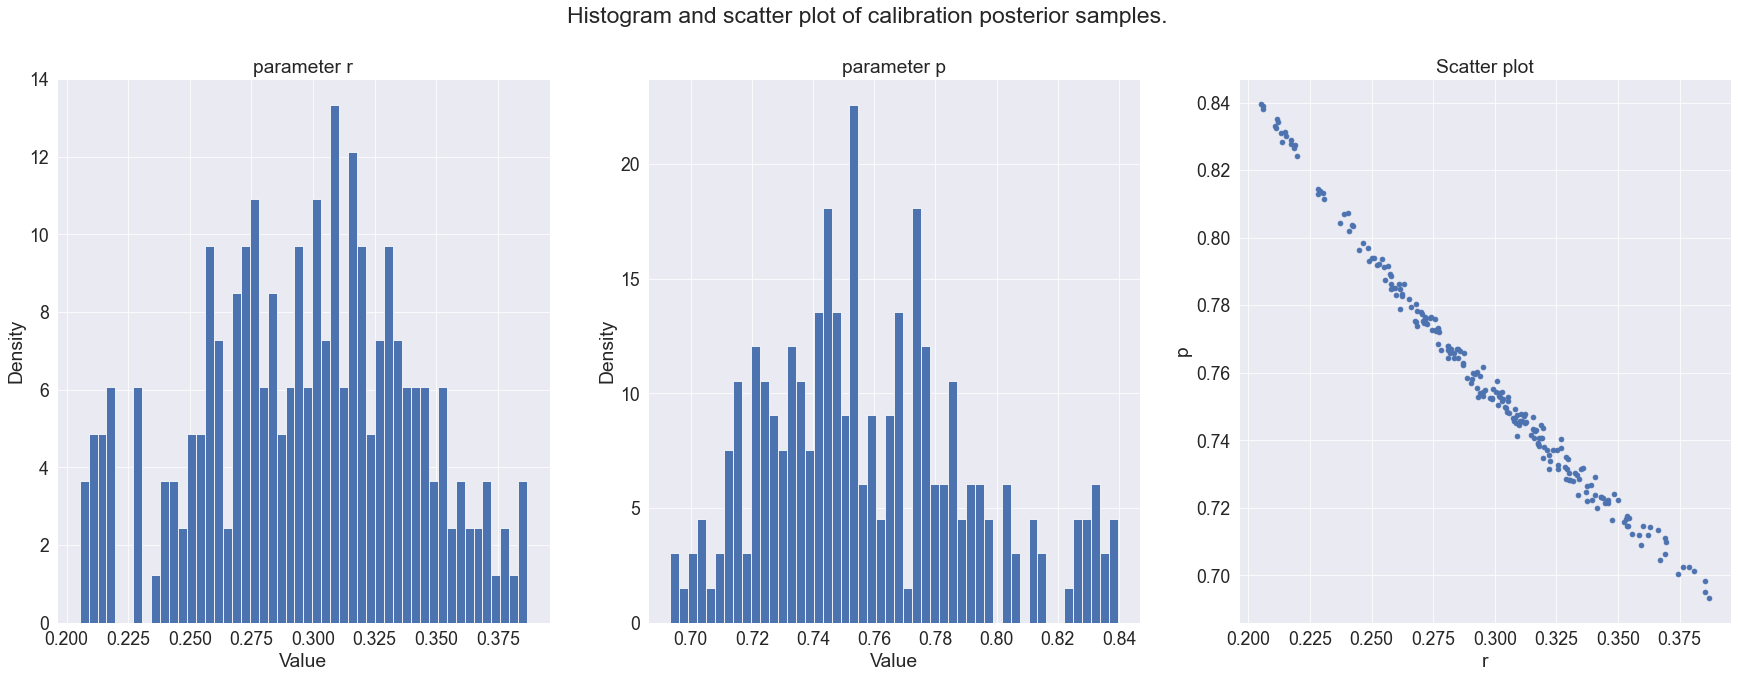

In [15]:
fig = plt.figure(figsize=(30,10))
num_bins = 50
if num_bins > len(m1_a_calib):
    num_bins = len(m1_a_calib)
for j in range(3):
    ax = fig.add_subplot(1,3,j+1)
    if j == 0:
        ax.hist(m1_a_calib, bins = num_bins, label = 'hist_r', density = True)

        #hist, bin_center = hist_1d(m1_a_calib, num_bins)
        #plt.step(bin_center,hist,where='mid')

        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.set_title('parameter r')
    elif j == 1:
        ax.hist(m1_b_calib, bins = num_bins, label = 'hist_p', density = True)

        #hist, bin_center = hist_1d(m1_b_calib, num_bins)
        #plt.step(bin_center,hist,where='mid')

        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.set_title('parameter p')
    else:
        ax.scatter(m1_a_calib, m1_b_calib, label = 'scatter_r_p')
        ax.set_xlabel('r')
        ax.set_ylabel('p')
        ax.set_title('Scatter plot')

fig.suptitle('Histogram and scatter plot of calibration posterior samples.')
if save_plots:
    plt.savefig(pref_file + 'calib_hist.pdf')
    plt.savefig(pref_file + 'calib_hist.png')
plt.show()

## Plot approximate posterior density from MCMC samples

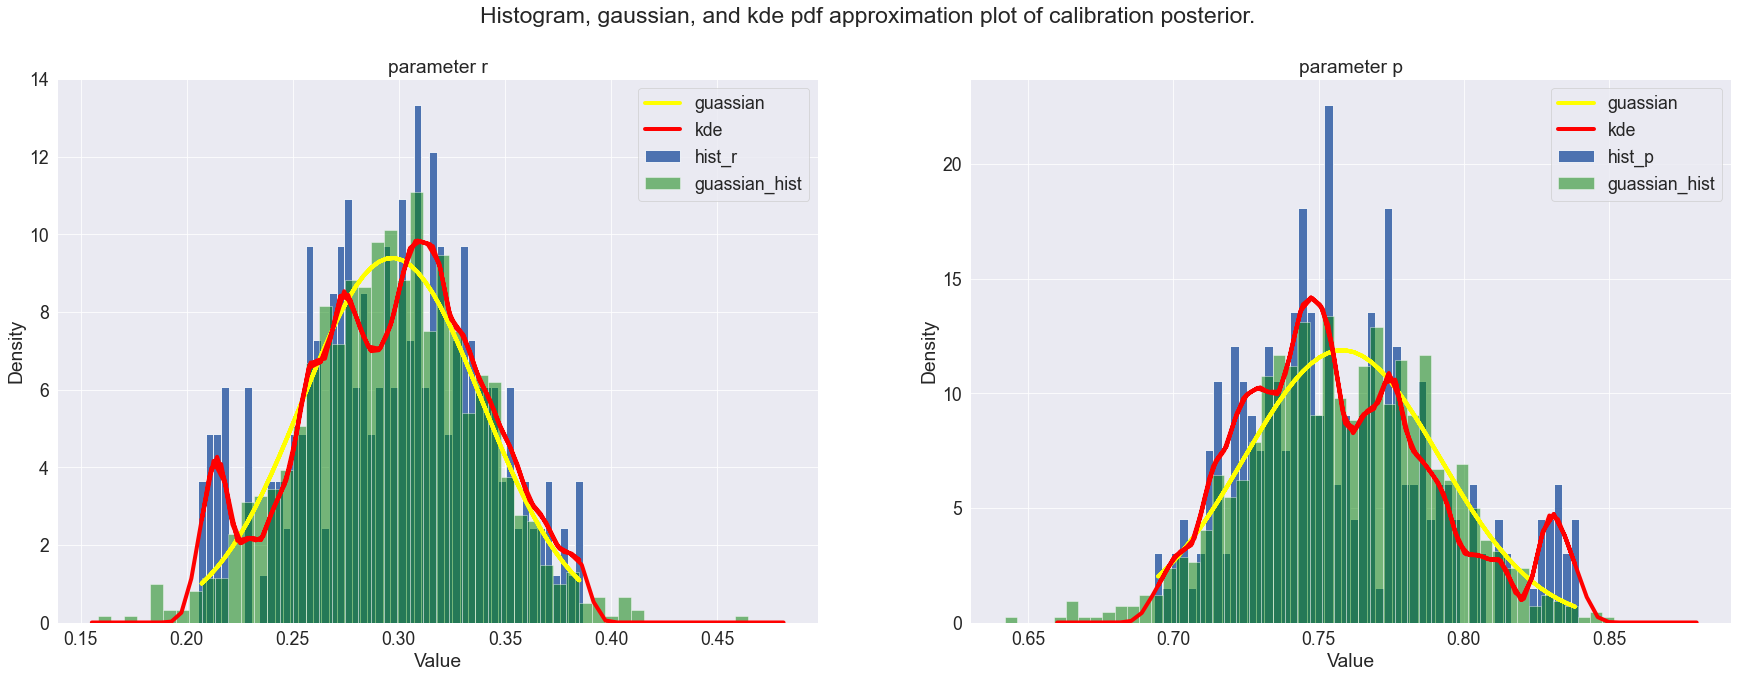

In [16]:
fig = plt.figure(figsize=(30,10))
num_bins = 50
if num_bins > len(m1_a_calib):
    num_bins = len(m1_a_calib)
for j in range(2):
    ax = fig.add_subplot(1,2,j+1)
    if j == 0:
        ax.hist(m1_a_calib, bins = num_bins, label = 'hist_r', density = True)

        hist, bins = hist_1d(m1_a_calib, num_bins)
        bins_ext = extend_bin(bins, 1. * np.min(bins), 1. * np.max(bins))

        # get mean and std deviation
        mu = np.mean(m1_a_calib)
        sigma = np.std(m1_a_calib)

        s = np.random.normal(mu, sigma, 1000)
        ax.hist(s, num_bins, density=True, color='green', 
                                label='guassian_hist', alpha=0.5)

        ax.plot(bins_ext, gaussian(bins_ext, mu, sigma), label='guassian',
                color='yellow', linewidth=4)

        # get kde
        samples = m1_a_calib
        bandwidth = 1.25 * (bins[1] - bins[0])
        bins_ext = extend_bin(bins, 0.75 * np.min(bins), 1.25 * np.max(bins))
        pdf_kde = kde(samples, bins_ext, bandwidth)
        ax.plot(bins_ext, pdf_kde, color='red', label='kde', linewidth=4)

        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.set_title('parameter r')
        ax.legend()
    elif j == 1:
        ax.hist(m1_b_calib, bins = num_bins, label = 'hist_p', density = True)

        hist, bins = hist_1d(m1_b_calib, num_bins)
        bins_ext = extend_bin(bins, 1. * np.min(bins), 1. * np.max(bins))

        # get mean and std deviation
        mu = np.mean(m1_b_calib)
        sigma = np.std(m1_b_calib)

        s = np.random.normal(mu, sigma, 1000)
        ax.hist(s, num_bins, density=True, color='green', 
                                label='guassian_hist', alpha=0.5)

        ax.plot(bins_ext, gaussian(bins_ext, mu, sigma), label='guassian',
                color='yellow', linewidth=4)

        # get kde
        samples = m1_b_calib
        bandwidth = 1.25 * (bins[1] - bins[0])
        bins_ext = extend_bin(bins, 0.95 * np.min(bins), 1.05 * np.max(bins))
        pdf_kde = kde(samples, bins_ext, bandwidth)
        ax.plot(bins_ext, pdf_kde, color='red', label='kde', linewidth=4)

        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.set_title('parameter p')
        ax.legend()

fig.suptitle('Histogram, gaussian, and kde pdf approximation plot of calibration posterior.')
if save_plots:
    plt.savefig(pref_file + 'calib_pdf.pdf')
    plt.savefig(pref_file + 'calib_pdf.png')
plt.show()

# Validation step

## Gaussian approximation of the calibration posterior samples
>We approximate the calibration posterior by Gaussian approximation of the calibration samples. The Initial value of parameter is taken as mean of the calibration samples. The acceptance rate in the Metropolis-Hastings is about $0.027\%$. The mean of the sample is $\theta^v_{mean} = (r^v_{mean}, p^v_{mean}) = (0.138, 0.938)$. 

In [17]:
# get kde for a and b params
num_bins = 50
if num_bins > len(m1_a_calib):
    num_bins = len(m1_a_calib)

# kde for a
samples = m1_a_calib
hist, bins = hist_1d(samples, num_bins)
bandwidth = 1.25 * (bins[1] - bins[0])
m1_a_calib_kde = KernelDensity(bandwidth=bandwidth)
m1_a_calib_kde.fit(samples)

# gaussian for a
m1_a_calib_mean = np.mean(samples)
m1_a_calib_std = np.std(samples)

# kde for b
samples = m1_b_calib
hist, bins = hist_1d(samples, num_bins)
bandwidth = 1.25 * (bins[1] - bins[0])
m1_b_calib_kde = KernelDensity(bandwidth=bandwidth)
m1_b_calib_kde.fit(samples)

# gaussian for b
m1_b_calib_mean = np.mean(samples)
m1_b_calib_std = np.std(samples)


def valid_kde_prior(theta):
    a = theta[0]
    b = theta[1]

    # log of pdf
    pa = log_kde(m1_a_calib_kde, np.array([a])[:, np.newaxis])[0]
    pb = log_kde(m1_b_calib_kde, np.array([b])[:, np.newaxis])[0]

    # take exp
    psum = pa + pb
    if psum < 1.e-5:
        psum = 1.e-5
    return np.exp(psum)

def valid_gaussian_prior(theta):
    a = theta[0]
    b = theta[1]

    # log of pdf
    pa = log_gaussian([a], m1_a_calib_mean, m1_a_calib_std)[0]
    pb = log_gaussian([b], m1_b_calib_mean, m1_b_calib_std)[0]

    # take exp
    psum = pa + pb
    if psum < 1.e-5:
        psum = 1.e-5
    return np.exp(psum)

### Generate posterior samples

In [18]:
# get new parameter by considering normal distribution centered at old value
transition_model = lambda x: np.random.normal(x,[1.,0.01],(2,))

# standard deviation of the noise of data
noise_sigma = 100.

# initial guess 
theta_0 = [np.mean(m1_a_calib), np.mean(m1_b_calib)]

## run
m1_acc_gauss_valid, m1_rej_gauss_valid, m1_num_acc_gauss_valid = metropolis_hastings(model, log_like, 
                                                 valid_gaussian_prior, 
                                                 transition_model,
                                                acceptance, theta_0, 100000,
                                                t_valid, Y_valid, m1_opts, 
                                                noise_sigma, dbg_lvl)


MCMC simulation
iteration: 10000, number of accepted: 13
iteration: 20000, number of accepted: 22
iteration: 30000, number of accepted: 23
iteration: 40000, number of accepted: 23
iteration: 50000, number of accepted: 25
iteration: 60000, number of accepted: 26
iteration: 70000, number of accepted: 26
iteration: 80000, number of accepted: 26
iteration: 90000, number of accepted: 27
Percentage of accepted samples: 0.027%




In [19]:
m1_a_gauss_valid, m1_b_gauss_valid = process_burn(m1_acc_gauss_valid, m1_rej_gauss_valid, 
                         per_acc(0.1, m1_num_acc_gauss_valid), model, 
                         t_valid, Y_valid, m1_opts, dbg_lvl, 'validation')

a_acc_burn shape: (14,)
b_acc_burn shape: (14,)


a_acc_burn_mean: 0.13760707196465102
b_acc_burn_mean: 0.9377661763415943




### Validation result
Validation result with the Gaussian approximation of the calibration MCMC samples. The model output at mean of the validation MCMC samples is shown along with the mean of QoI distribution (see formula (16)). The mean of QoI is closer to the data which suggests that QoI should be computed using (16) taking into account the MCMC samples.

In [20]:
m1_qoi_valid = get_qoi_valid(model, m1_a_gauss_valid, m1_b_gauss_valid, t_valid, m1_opts)

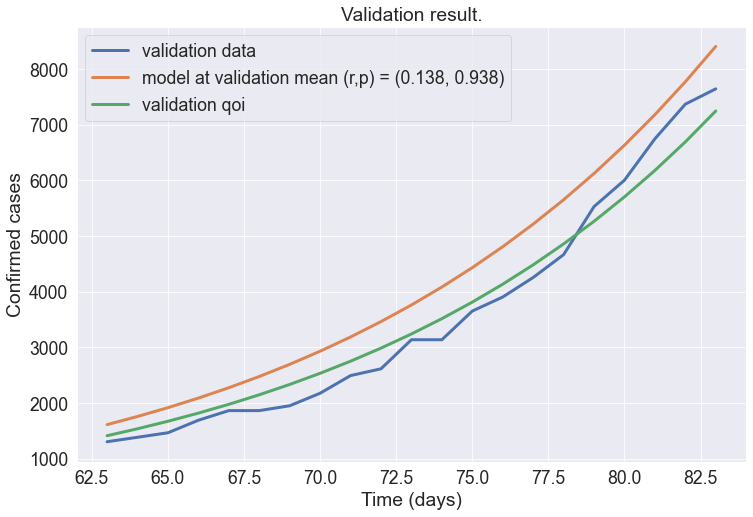

In [21]:
fig  = plt.figure(figsize=(12,8))


# plot at mean of samples
m1_a_mean_valid = np.mean(m1_a_gauss_valid)
m1_b_mean_valid = np.mean(m1_b_gauss_valid)

m1_C_acc_burn_valid = model([m1_a_mean_valid, m1_b_mean_valid], t_valid, m1_opts)

plt.plot(t_valid, Y_valid, label='validation data')
plt.plot(t_valid, m1_C_acc_burn_valid, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, 

                                                                        m1_b_mean_valid))
# plot mean of QoI
plt.plot(t_valid, m1_qoi_valid, label='validation qoi')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.title('Validation result.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'gauss_valid_qoi.pdf')
    plt.savefig(pref_file + 'gauss_valid_qoi.png')
plt.show()

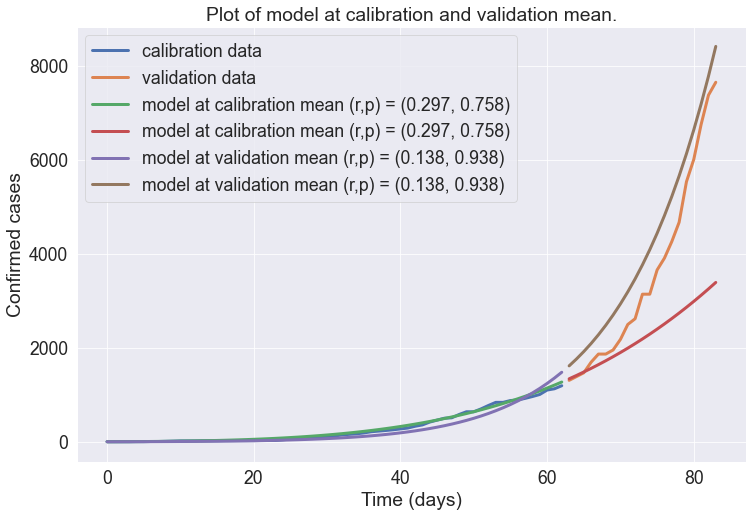

In [22]:
## Plot model and data
fig  = plt.figure(figsize=(12,8))

# get model
m1_a_mean_valid = np.mean(m1_a_gauss_valid)
m1_b_mean_valid = np.mean(m1_b_gauss_valid)

m1_C_acc_burn_calib = model([m1_a_mean_calib, m1_b_mean_calib], t_calib, m1_opts)
m1_C_acc_burn_calib_valid = model([m1_a_mean_calib, m1_b_mean_calib], t_valid, m1_opts)
m1_C_acc_burn_valid_calib = model([m1_a_mean_valid, m1_b_mean_valid], t_calib, m1_opts)
m1_C_acc_burn_valid = model([m1_a_mean_valid, m1_b_mean_valid], t_valid, m1_opts)

plt.plot(t_calib, Y_calib, label='calibration data')
plt.plot(t_valid, Y_valid, label='validation data')
# plt.plot(t, C_acc, label='{} (without burn-in)'.format(step_name))
plt.plot(t_calib, m1_C_acc_burn_calib, 
         label='model at calibration mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_calib, m1_b_mean_calib))
plt.plot(t_valid, m1_C_acc_burn_calib_valid, 
         label='model at calibration mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_calib, m1_b_mean_calib))
plt.plot(t_calib, m1_C_acc_burn_valid_calib, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, m1_b_mean_valid))
plt.plot(t_valid, m1_C_acc_burn_valid, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, m1_b_mean_valid))
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.title('Plot of model at calibration and validation mean.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'gauss_valid_with_calib_plot.pdf')
    plt.savefig(pref_file + 'gauss_valid_with_calib_plot.png')
plt.show()

### Validation error
>The validation error $e^v$, see definition (17), is found to be 0.00596 (could change a bit in every run). This is below the $\gamma_{tol} = 0.01$ so we declare the model as “Not invalid”.

In [23]:
# compute ev
m1_qoi_data_diff_valid = Y_valid - m1_qoi_valid
ev = m1_qoi_data_diff_valid.dot(m1_qoi_data_diff_valid) / (Y_valid.dot(Y_valid))

print('Validation error: {}'.format(ev))

Validation error: 0.005957472635167443


## KDE approximation of the calibration posterior samples
>We approximate the calibration posterior by Gaussian approximation of the calibration samples. The Initial value of parameter is taken as mean of the calibration samples. The acceptance rate in the Metropolis-Hastings is about $0.033\%$. The mean of the sample is $\theta^v_{mean} = (r^v_{mean}, p^v_{mean}) = (0.137, 0.94)$.

### Generate posterior samples

In [24]:
# get new parameter by considering normal distribution centered at old value
transition_model = lambda x: np.random.normal(x,[1.,0.01],(2,))

# standard deviation of the noise of data
noise_sigma = 100.

# initial guess 
theta_0 = [np.mean(m1_a_calib), np.mean(m1_b_calib)]

## run
m1_acc_kde_valid, m1_rej_kde_valid, m1_num_acc_kde_valid = metropolis_hastings(model, log_like, 
                                                 valid_kde_prior, 
                                                 transition_model,
                                                acceptance, theta_0, 100000,
                                                t_valid, Y_valid, m1_opts, 
                                                noise_sigma, dbg_lvl)


MCMC simulation
iteration: 10000, number of accepted: 15
iteration: 20000, number of accepted: 20
iteration: 30000, number of accepted: 24
iteration: 40000, number of accepted: 28
iteration: 50000, number of accepted: 30
iteration: 60000, number of accepted: 30
iteration: 70000, number of accepted: 30
iteration: 80000, number of accepted: 31
iteration: 90000, number of accepted: 32
Percentage of accepted samples: 0.033%




In [25]:
m1_a_kde_valid, m1_b_kde_valid = process_burn(m1_acc_kde_valid, m1_rej_kde_valid, 
                         per_acc(0.1, m1_num_acc_kde_valid), model, 
                         t_valid, Y_valid, m1_opts, dbg_lvl, 'validation')

a_acc_burn shape: (18,)
b_acc_burn shape: (18,)


a_acc_burn_mean: 0.13688557793963094
b_acc_burn_mean: 0.9395462430699




### Validation result
Validation result with the Gaussian approximation of the calibration MCMC samples. The model output at mean of the validation MCMC samples is shown along with the mean of QoI distribution (see formula (16)). The mean of QoI is closer to the data which suggests that QoI should be computed using (16) taking into account the MCMC samples.

In [26]:
m1_qoi_valid = get_qoi_valid(model, m1_a_kde_valid, m1_b_kde_valid, t_valid, m1_opts)

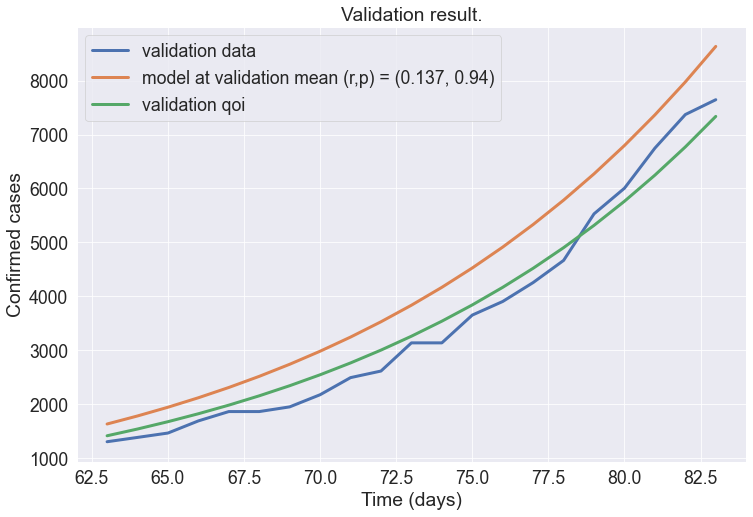

In [27]:
fig  = plt.figure(figsize=(12,8))


# plot at mean of samples
m1_a_mean_valid = np.mean(m1_a_kde_valid)
m1_b_mean_valid = np.mean(m1_b_kde_valid)

m1_C_acc_burn_valid = model([m1_a_mean_valid, m1_b_mean_valid], t_valid, m1_opts)

plt.plot(t_valid, Y_valid, label='validation data')
plt.plot(t_valid, m1_C_acc_burn_valid, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, 

                                                                        m1_b_mean_valid))
# plot mean of QoI
plt.plot(t_valid, m1_qoi_valid, label='validation qoi')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.title('Validation result.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'kde_valid_qoi.pdf')
    plt.savefig(pref_file + 'kde_valid_qoi.png')
plt.show()

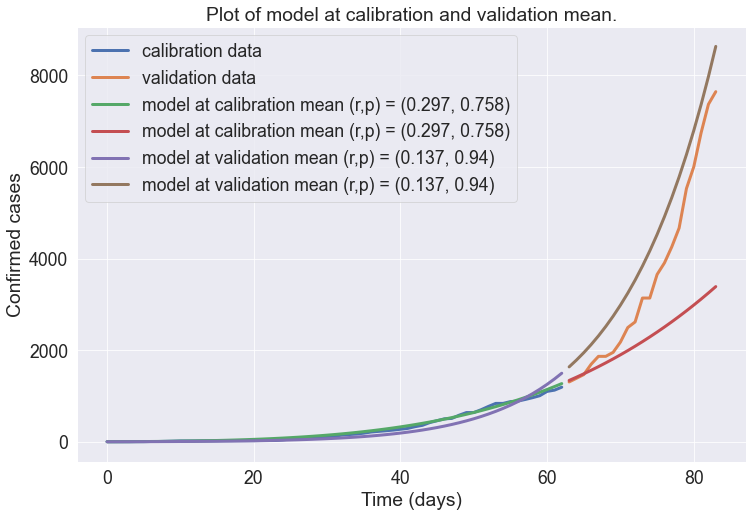

In [28]:
## Plot model and data
fig  = plt.figure(figsize=(12,8))

# get model
m1_a_mean_valid = np.mean(m1_a_kde_valid)
m1_b_mean_valid = np.mean(m1_b_kde_valid)

m1_C_acc_burn_calib = model([m1_a_mean_calib, m1_b_mean_calib], t_calib, m1_opts)
m1_C_acc_burn_calib_valid = model([m1_a_mean_calib, m1_b_mean_calib], t_valid, m1_opts)
m1_C_acc_burn_valid_calib = model([m1_a_mean_valid, m1_b_mean_valid], t_calib, m1_opts)
m1_C_acc_burn_valid = model([m1_a_mean_valid, m1_b_mean_valid], t_valid, m1_opts)

plt.plot(t_calib, Y_calib, label='calibration data')
plt.plot(t_valid, Y_valid, label='validation data')
# plt.plot(t, C_acc, label='{} (without burn-in)'.format(step_name))
plt.plot(t_calib, m1_C_acc_burn_calib, 
         label='model at calibration mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_calib, m1_b_mean_calib))
plt.plot(t_valid, m1_C_acc_burn_calib_valid, 
         label='model at calibration mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_calib, m1_b_mean_calib))
plt.plot(t_calib, m1_C_acc_burn_valid_calib, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, m1_b_mean_valid))
plt.plot(t_valid, m1_C_acc_burn_valid, 
         label='model at validation mean (r,p) = ({:.3}, {:.3})'.format(m1_a_mean_valid, m1_b_mean_valid))
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.title('Plot of model at calibration and validation mean.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'kde_valid_with_calib_plot.pdf')
    plt.savefig(pref_file + 'kde_valid_with_calib_plot.png')
plt.show()

### Validation error
>The validation error $e^v$, see definition (17), is found to be 0.00551 (could change a bit in every run). This is below the $\gamma_{tol} = 0.01$ so we declare the model as “Not invalid”.

In [29]:
# compute ev
m1_qoi_data_diff_valid = Y_valid - m1_qoi_valid
ev = m1_qoi_data_diff_valid.dot(m1_qoi_data_diff_valid) / (Y_valid.dot(Y_valid))

print('Validation error: {}'.format(ev))

Validation error: 0.005505931496750207


## Effect of approximation of posterior samples
From the results, we see that there is no significant effect of changing Gaussian approximation with more accurate KDE approximation of calibration posterior samples. The error $e^v$ in the case of Gaussian is 0.00596 and in the case of KDE is 0.00551.

# Prediction and uncertainty in the prediction

## Validation posterior obtained through Gaussian approximation of calibration posterior samples
>Model prediction of QoI (number of cases at day 100) is Q = 27563 with the uncertainty 7998 i.e. 29%.

In [30]:
predict_gauss, predict_gauss_mean, predict_gauss_std = get_qoi_dist(model, m1_a_gauss_valid, 
                                                                    m1_b_gauss_valid, 100., m1_opts)
print('Prediction: {}'.format(predict_gauss_mean))
print('Uncertainty in prediction: {}'.format(predict_gauss_std))
print('Uncertainty in prediction: {}%'.format(predict_gauss_std * 100. / predict_gauss_mean))

Prediction: 27563.478715467383
Uncertainty in prediction: 7998.349692885828
Uncertainty in prediction: 29.017925405756255%


## Validation posterior obtained through KDE approximation of calibration posterior samples
>Model prediction of QoI (number of cases at day 100) is Q = 28251 with the uncertainty 8118 i.e. 28%.

In [31]:
predict_kde, predict_kde_mean, predict_kde_std = get_qoi_dist(model, m1_a_kde_valid, 
                                                              m1_b_kde_valid, 100., m1_opts)
print('Prediction: {}'.format(predict_kde_mean))
print('Uncertainty in prediction: {}'.format(predict_kde_std))
print('Uncertainty in prediction: {}%'.format(predict_kde_std * 100. / predict_kde_mean))

Prediction: 28251.92274697319
Uncertainty in prediction: 8118.381582080578
Uncertainty in prediction: 28.735678115750023%


## QoI distribution

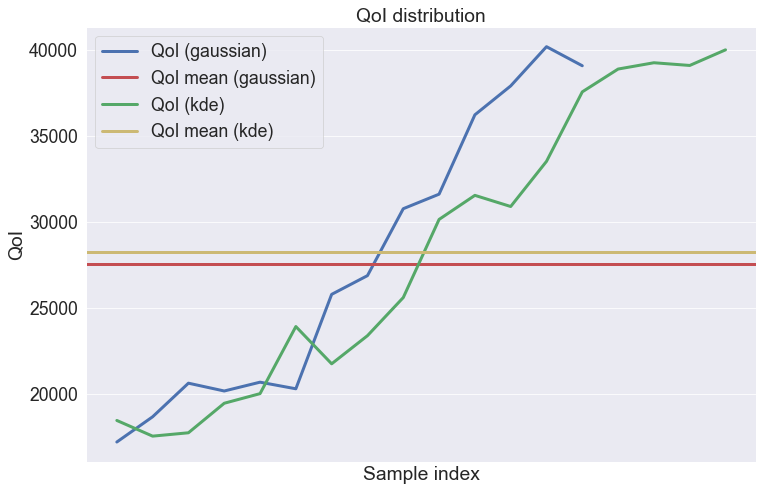

In [32]:
fig = plt.figure(figsize=(12,8))
plt.plot(predict_gauss, label = 'QoI (gaussian)', color = 'b')
plt.axhline(y=predict_gauss.mean(), label = 'QoI mean (gaussian)', color = 'r')
plt.plot(predict_kde, label = 'QoI (kde)', color = 'g')
plt.axhline(y=predict_kde.mean(), label = 'QoI mean (kde)', color = 'y')
plt.xticks([])
plt.xlabel('Sample index')
plt.ylabel('QoI')
plt.title('QoI distribution')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'pred_qoi_dist.pdf')
    plt.savefig(pref_file + 'pred_qoi_dist.png')
plt.show()

## Model prediction plot

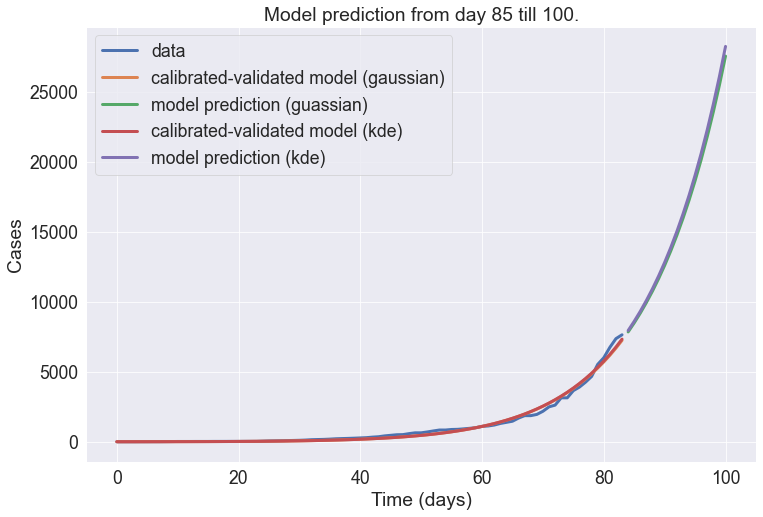

In [33]:
t_pred = [84. + i for i in range(17)]

p1, p1_pred = get_predict_vec(model, m1_a_gauss_valid, m1_b_gauss_valid, 
                             t_pred, m1_opts, t, Y)
p2, p2_pred = get_predict_vec(model, m1_a_kde_valid, m1_b_kde_valid, 
                             t_pred, m1_opts, t, Y)

# plot
plt.figure(figsize=(12,8))
plt.plot(t, Y, label = 'data', linewidth = 3)
plt.plot(t, p1, label = 'calibrated-validated model (gaussian)', linewidth = 3)
plt.plot(t_pred, p1_pred, label = 'model prediction (guassian)', linewidth = 3)

plt.plot(t, p2, label = 'calibrated-validated model (kde)', linewidth = 3)
plt.plot(t_pred, p2_pred, label = 'model prediction (kde)', linewidth = 3)

plt.xlabel('Time (days)')
plt.ylabel('Cases')
plt.title('Model prediction from day 85 till 100.')
plt.legend()
if save_plots:
    plt.savefig(pref_file + 'pred_interval.pdf')
    plt.savefig(pref_file + 'pred_interval.png')
plt.show()

# Credits

1. Hastings, W. K., 1970. Monte carlo sampling methods using markov chains and their applications.
2. Jha, P. K., 2020. Covid 19 data. https://github.com/prashjha/StudyCovid19.
3. Moukarzel, J., 2018. From scratch: Bayesian inference, Markov chain Monte Carlo and Metropolis Hastings, in python.
https://github.com/Joseph94m/MCMC/blob/master/MCMC.ipynb.
4. Oden, J., 2017. Foundations of predictive computational sciences. ICES Reports.
5. Viboud, C., Simonsen, L., Chowell, G., 2016. A generalized-growth model to characterize the early ascending phase of infectious disease outbreaks. Epidemics 15, 27–37.

### Citing this work
For citations, use following bibliographic referece

>J. Tinsley Oden, Prashant K. Jha, Lianghao Cao, Taemin Heo, Jing Hu, Mathew Hu, Jonathan Kelley, Jaime D. Mora Paz, Cyrus Neary, Akhil Potla, Sheroze Sherriffdeen, Chase Tessmer, and Christine Yang, "Assessment of Predictability of a Class of Models of Growth of Coronavirus 19 Cases as an Exercise in Predictive Computational Science ," Oden Institute REPORT 20-10, Oden Institute for Computational Engineering and Sciences, The University of Texas at Austin, May 2020.